# Correção automática de redações

A correção automática de redações (CAR) é uma aplicação do Processamento de Linguagem Natural (PLN) que visa automatizar a avaliação de textos, como nas provas do Exame Nacional do Ensino Médio (ENEM). A correção manual de redações, especialmente no ENEM, é demorada, e a CAR surge como uma solução eficiente para identificar erros, atribuir notas e fornecer feedback aos alunos.

No ENEM, a redação segue o formato dissertativo-argumentativo, onde o aluno deve apresentar uma argumentação sobre um tema específico. A avaliação é feita com base em cinco competências: domínio da norma culta, adequação ao tema, coerência dos argumentos, coesão textual e proposta de intervenção. Cada uma dessas competências contribui para a nota final, que pode chegar a 1000 pontos. A competência de língua portuguesa avalia erros gramaticais, enquanto a adequação ao tema verifica se o aluno manteve o foco. A coerência e a coesão avaliam, respectivamente, a organização lógica e o uso correto de conectivos, e a proposta de intervenção exige uma solução para o problema abordado.

Para automação, a CAR utiliza ferramentas que detectam desvios como erros ortográficos e gramaticais através de diferentes abordagens (simbólica e estatística, por exemplo). Ferramentas como o CoGroo e o LanguageTool possuem recursos para correção de erros de pontuação e erros gramaticais, que englobam concordância, colocação pronominal, regência nominal e verbal, entre outros. Além disso, técnicas de aprendizado de máquina podem ser empregadas para atribuir notas com base em padrões extraídos de um corpus de redações. Essas notas podem adotar um caráter global, ou seja, uma única nota para toda a redação, como também podem ser segmentadas em notas para cada critério de avaliação.

Uma das principais vantagens da CAR é a possibilidade de oferecer feedback automático aos alunos, destacando erros e sugerindo melhorias. Esse retorno permite que o aluno corrija aspectos como coesão e coerência, fundamentais para alcançar boas notas no ENEM. Assim, a CAR não apenas otimiza a correção, mas também contribui para o aprendizado, oferecendo suporte detalhado e objetivo.

# Essay-BR: a Brazilian Corpus of Essays

O Essay-BR é um grande corpus de redações argumentativas escritas por estudantes brasileiros do ensino médio, focado na avaliação automática de redações (AES). O objetivo é preencher a lacuna na disponibilidade de corpora em português para essa tarefa, já que a maioria dos recursos de AES está disponível apenas em inglês. O corpus contém 4.570 redações e 86 temas, sendo todas avaliadas com base nos critérios do Exame Nacional do Ensino Médio (ENEM), que utiliza cinco competências: norma culta, adequação ao tema, coerência, coesão e proposta de intervenção.

Além de construir o corpus, os autores realizaram experimentos com métodos baseados em características e compararam com abordagens anteriores, destacando os desafios específicos da língua portuguesa. O corpus, que é de acesso público, visa incentivar o desenvolvimento de novos métodos para avaliação automática de redações em português, facilitando a pesquisa na área.

A seguir é feito o carregamento do do conjunto de redações Essay-BR, disponível no repositório "https://github.com/rafaelanchieta/essay".



In [1]:
import pandas as pd

# Fazendo a leitura do conjunto de redações
df_redacoes = pd.read_csv('essay-br/essay-br.csv')
df_redacoes

,prompt,title,essay,competence,score
0,21,A greve dos caminhoneiros e a malha ferroviária,['A grande importância dos caminhoneiros para ...,"[160, 160, 120, 120, 120]",680
1,23,"Vossa excelência Senador M. M.,",['O senhor e eu já estamos cientes do projeto ...,"[160, 160, 120, 120, 120]",680
2,39,A validade do impeachment,['É de conhecimento geral dos brasileiros o qu...,"[120, 160, 160, 160, 120]",720
3,26,Podemos perceber que a sociedade brasileira,['Podemos perceber que a sociedade brasileira ...,"[120, 120, 80, 120, 120]",560
4,4,Comenta-se que o ex-presidente Lula,['Comenta-se que o ex presidente Lula ex-presi...,"[0, 0, 0, 0, 0]",0
...,...,...,...,...,...
4565,43,redes sociais,"['Em constante evolução tecnológica , o mundo ...","[160, 120, 120, 120, 120]",640
4566,60,Reforma da Previdência uma solução para o Brasil.,"['“O importante da vida não é viver, mas viver...","[120, 80, 80, 120, 80]",480
4567,44,"lados opostos, mesmo problema",['O esporte – seja qual for – é comporto por r...,"[160, 200, 160, 200, 200]",920
4568,49,Da Ficção à Realidade,"['José Saramago, proeminente escritor e dramat...","[160, 160, 160, 160, 160]",800


In [2]:
# Fazendo a leitura dos textos motivadores
df_prompts = pd.read_csv('essay-br/prompts.csv')
df_prompts

,id,description
0,0,"['No Carnaval de 2020, veio novamente à tona u..."
1,1,['O número de pessoas desempregadas no mundo d...
2,2,"['Ao longo dos últimos dez anos, o papel do ST..."
3,3,"['Com o avanço da biotecnologia, da engenharia..."
4,4,"['No início deste mês de novembro, o Supremo T..."
...,...,...
81,81,"A questão não é opção religiosa, mas a liberda..."
82,82,"""Antes de demonizar a automedicação e pintá-la..."
83,83,"""O homem moderno vem deixando de lado as práti..."
84,84,"O presidente dos Estados Unidos, Barack Obama,..."


# Observações iniciais sobre conjunto de dados

Ao carregar as bases de dados, percebe-se que existem, de fato, 4570 redações. Cada instância do conjunto de dados possui a dissertação argumentativa (essay), o título da redação (title), a nota para cada um dos cinco critérios de avaliação (competence), a nota total (score) e o identificador do texto motivador (prompt, ou tema). O texto motivador está presente no documento "prompts.csv", relacionado ao seu identificador.

# Análise das notas

A nota da redação do ENEM é calculada a partir da soma de cinco competências:

- Competência 1: Adesão à norma formal escrita do português.

- Competência 2: Conformidade com o gênero de texto argumentativo e com o tema proposto, utilizando conhecimentos de diferentes áreas.

- Competência 3: Selecionar, relacionar, organizar argumentos em defesa de um ponto de vista (coerência).

- Competência 4: Uso de estruturas linguísticas argumentativas e articulação entre os componentes do texto (coesão).

- Competência 5: Elaborar uma proposta para resolver o problema em questão (proposta de intervenção).

Abaixo, é mostrada a distribuição das notas totais, onde, a partir do histograma, pode-se afirmar, dentre as informações evidentes, que as cinco notas mais frequentes foram, em ordem decrescente, 600, 680, 720, 520 e 560.


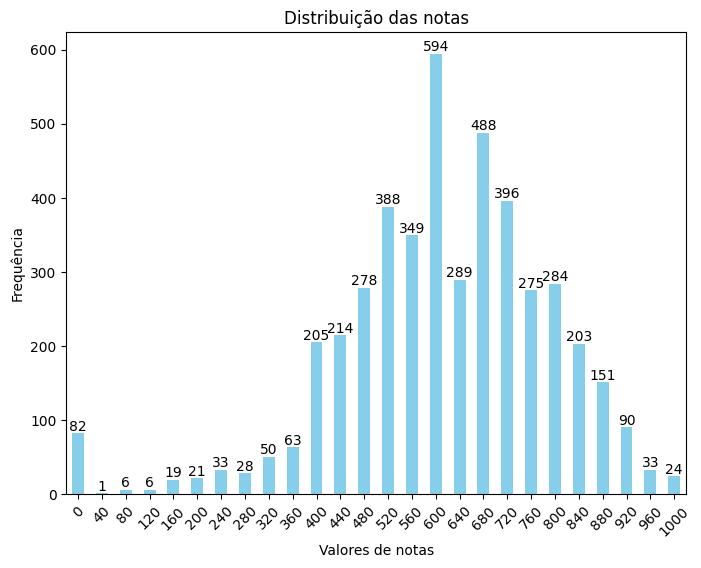

In [4]:
import matplotlib.pyplot as plt

# Criando o gráfico de barras para a distribuição dos valores da coluna 'score' (nota final da redação)
plt.figure(figsize=(8, 6))
ax = df_redacoes['score'].value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.title('Distribuição das notas')
plt.xlabel('Valores de notas')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Adicionando a frequência exata no topo de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Análise das competências

Na redação do enem, cada competência pode assumir 6 pontuações, iniciando em 0 e atingindo um máximo de 200, variando em 40 pontos. Ou seja, pode assumir os valores 0, 40, 80, 120, 160 e 200.
Abaixo, é contabilizada a frequência de notas para cada uma das competências. 

A partir das visualizações geradas pode-se afirmar que a pontuação 120 é a mais frequente para todas as competências. Porém, a competência 2, que remete à conformidade com o gênero textual e ao tema proposto, teve uma quantidade de pontuações '160' acima das demais competências, indicando que os redatores possuem um melhor domínio do segundo critério de avaliação.

In [5]:
import ast

df = df_redacoes
# Convertendo a string para listas reais
df['competence'] = df['competence'].apply(ast.literal_eval)

# Separando as notas por competência
df_notas = pd.DataFrame(df['competence'].tolist(), columns=['Competência 1', 'Competência 2', 'Competência 3', 'Competência 4', 'Competência 5'])

# Calculando a frequência de cada nota por competência
frequencias = df_notas.apply(pd.Series.value_counts).fillna(0).astype(int)

# Exibindo a tabela de frequência
print(frequencias)

     Competência 1  Competência 2  Competência 3  Competência 4  Competência 5
0               97            109            122            134            302
40              24             79            146             61            276
80             359            689           1206            590           1023
120           2630           1711           2130           2000           1732
160           1338           1705            827           1241            815
200            122            277            139            544            422


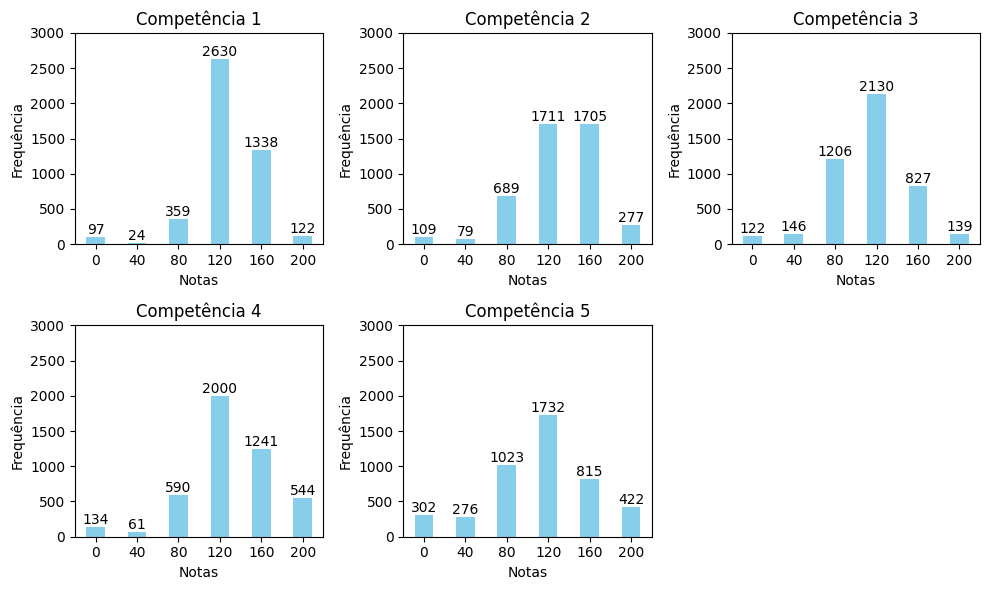

In [6]:
# Criando histogramas para cada competência
competencias = df_notas.columns

plt.figure(figsize=(10, 6))  # Ajustando a largura e altura da figura
for i, competencia in enumerate(competencias, start=1):
    plt.subplot(2, 3, i)  # Ajuste para o número de competências
    bars = plt.bar(frequencias.index, frequencias[competencia], color='skyblue', width=18)  # Definindo as barras do histograma
    plt.title(competencia)
    plt.xlabel('Notas')
    plt.ylabel('Frequência')
    plt.xticks(frequencias.index)

    # Definindo o limite do eixo y
    plt.ylim(0, 3000)

    # Adicionando os valores em cima de cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Análise dos temas

A seguir, é mostrada a frequência de redações para cada tema (prompt) e a respectiva média das notas para cada um dos temas. 

A partir dessa análise se observa que o tema identificado como 83 foi o mais frequente no conjunto de dados. Além disso, o tema cujas notas constituiram a maior média foi o tema 84. 

In [7]:
# Agrupar por 'prompt' (tema) e calcular a frequência de cada tema
frequencia = df.groupby('prompt').size().reset_index(name='frequência')
frequencia_ordenada = frequencia.sort_values(by='frequência', ascending=False).reset_index(drop=True)
frequencia_ordenada

,prompt,frequência
0,83,151
1,84,148
2,82,127
3,51,121
4,50,120
...,...,...
81,26,16
82,25,16
83,37,16
84,32,16


In [8]:
# Agrupar por 'prompt' (tema) e calcular a média das notas de cada tema
medias = df.groupby('prompt')['score'].mean().reset_index(name='media_nota')
medias['media_nota'] = medias['media_nota'].round(2)
medias_ordenadas = medias.sort_values(by='media_nota', ascending=False).reset_index(drop=True)
medias_ordenadas

,prompt,media_nota
0,84,787.03
1,43,785.08
2,44,768.85
3,46,749.83
4,83,738.54
...,...,...
81,53,409.41
82,17,404.44
83,33,390.00
84,25,350.00


# Suposições sobre a correção automática de redações do ENEM

Após analisar brevemente o conjunto de dados do Essay-BR, algumas dúvidas e suposições sobre o processo de correção automática vêm a tona. 

Um sistema de correção automátia de redações focado no ENEM deve ser capaz de identificar os desvios presentes na dissertação argumentativa, atribuir uma nota para as competências e retornar um feedback para o redator. Tendo isso em vista, serão levantadas algumas dúvidas e suposições relacionandas a forma como o sistema deve atuar, mantendo um olhar sobre os critérios de avalização.

### Competência 1: Norma Culta da Língua Portuguesa

Esta competência avalia o uso correto da gramática, ortografia e pontuação. A detecção de desvios ortográficos e gramaticais está diretamente relacionada a essa competência. Existem ferramentas como CoGroo e o LanguageTool que podem ser usadas para identificar erros ortográficos, de acentuação, concordância nominal e verbal, entre outros, influenciando diretamente a nota atribuída nesta competência. Esses erros podem ser marcados para que o aluno veja o erro e compreenda como corrigi-lo. De maneira semelhante, a nota dessa competência pode ser calculada com base na quantidade de erros identificados.

### Competência 2: Compreensão e Adequação ao Gênero e Tema

A conformidade com o gênero dissertativo-argumentativo e o tema proposto pode ser avaliada pela identificação de desvios de gênero. O sistema deve ser capaz de reconhecer quando o aluno utiliza um vocabulário inadequado para o gênero ou quando se afasta do tema proposto. Por exemplo, o uso de pronomes em primeira pessoa do singular em uma dissertação pode ser considerado um desvio. A detecção automática desses desvios permite penalizar textos que não estejam adequados ao gênero esperado, afetando diretamente a nota desta competência. Mas que tipo de ferramenta poderia ser utilizada para comparar o tema e o a dissertação desenvolvida? Como um sistema identificaria um termo inadequado?

### Competência 3: Coerência e Progressão Argumentativa

A coerência entre os argumentos e a progressão textual são centrais para esta competência. A detecção de desvios relacionados à estrutura argumentativa e à articulação das ideias pode ajudar a avaliar a consistência dos argumentos apresentados pelo aluno. Mas qual tecnologia seria capaz de medir a consistência e a relação entre os argumentos?

### Competência 4: Coesão Textual

O uso correto de elementos coesivos, como conectivos e pronomes, é essencial para a coesão do texto. A identificação de desvios coesivos, como o uso incorreto de pronomes e conectivos, pode impactar negativamente esta competência. O sistema de correção pode detectar esses erros e sugerir a substituição adequada, ajudando o aluno a entender o desvio e melhorar a coesão de seus textos.

### Competência 5: Proposta de Intervenção

A competência 5 exige que o aluno elabore uma proposta de intervenção com cinco elementos (agente, ação, meio, finalidade, detalhamento). A detecção automática pode identificar a presença ou ausência desses elementos na proposta, influenciando a nota atribuída. Dessa forma, modelos de extração de entidades nomeadas podem ser uma alternativa para detectar quando o aluno apresenta corretamente os componentes da proposta.

### Feedback Automático

A geração de feedback detalhado para o aluno pode ser feita com base nos desvios detectados. O feedback ajuda o aluno a identificar onde errou e como melhorar, especialmente em termos de norma culta (Competência 1) e progressão argumentativa (Competência 3). A capacidade de fornecer sugestões personalizadas a partir dos desvios identificados fortalece o aprendizado, contribuindo para o desenvolvimento contínuo da escrita. Por esse motivo, uma possibilidade seria o desenvolvimento de um modelo de linguagem generativo que forneça, em formato textual, os desvios identificados pelo sistema e as possíveis substituições.


# Plano de Solução

Com base nos apontamentos feitos no tópico anterior, percebe-se que a correção automática das redações envolve uma sequência de atividades distintas. A identificação de erros gramaticais e ortográficos poderia ser feita por meio de ferramentas como a LanguageTool. A fidelidade ao gênero textual e ao tema proposto poderia ser verificada por meio de um modelo de machine learning que modele a relação entre a redação, o texto motivador e a nota atribuída a essa competência. A intervenção poderia ser avaliada por meio do reconhecimento de entidades nomeadas, técnica capaz de identificar os termos que configuram uma proposta significante.

Em suma, é notório que o processo de avaliação da redação e geração de feedbak engloba múltiplas tarefas relacionadas à interpretação da linguagem humana e a geração de texto; e seria necessário unir diferentes técnicas para avaliar as múltiplas competências que envolvem a dissertação-argumentativa do ENEM. Porém, atualmente, existem tecnologias que vêm ganhando força no cenário da inteligência artifical justamente por serem capazes de realizar todas as tarefas mencionadas com maestria. Se tratam dos grandes modelos de linguagem (LLMs)

Os Grandes Modelos de Linguagem (LLMs) são redes neurais extremamente complexas, capazes de processar e gerar texto natural com coerência e contexto aprimorados. Estes modelos incluem exemplos notáveis, como GPT-4, T5, BERT, e Bloom, que têm milhões ou até bilhões de parâmetros. Eles foram desenvolvidos para realizar tarefas de processamento de linguagem natural (PLN), como resposta a perguntas, tradução automática, resumo, e muito mais. Esses modelos utilizam a arquitetura Transformer, que revolucionou o campo de PLN com sua habilidade de capturar longas dependências contextuais em texto.

No mundo da IA generativa, tópicos como RAG (Retrieval Augmented Generation) e Fine-Tuning são frequentes quando se deseja modelar um modelo de linguagem para a resolução de problemas específicos.

Embora os modelos pré-treinados em grandes corpora de texto sejam competentes em muitas tarefas, eles frequentemente exigem fine-tuning para se adaptar a tarefas específicas. O fine-tuning é o processo de ajustar um modelo com dados adicionais, específicos para a tarefa em questão, melhorando seu desempenho e adequação ao contexto de uso.

A técnica de Recuperação e Geração (RAG), em contrapartida, combina o poder de modelos de recuperação de informações com modelos generativos, sendo uma abordagem poderosa para responder a perguntas e gerar textos com base em uma base de conhecimento específica. Essa técnica divide o problema em duas etapas: Recuperação e Geração. A primeira utiliza embeddings para encontrar informações semelhantes ao contexto do prompt. A segunda gera uma resposta utilizando o prompt em conjunto com o material recuperado na primeira etapa, permitindo que o modelo produza respostas informadas sem a necessidade de treinamento completo em cada área de conhecimento.

Para desenvolver um modelo generativo que avalie redações, atribua notas e forneça feedback ao redator, o fine-tuning de um modelo de linguagem em português se mostra uma excelente opção. Essa metodologia permite ajustar o conhecimento prévio do modelo às exigências específicas do ENEM. Assim, os dados provenientes da pesquisa Essay-BR podem servir de base para o ajuste de algum modelo já consolidado.

### Features

Os prompts em IA generativa são entradas ou instruções dadas ao modelo para guiar a geração de texto. Eles podem ser perguntas, frases ou contextos que o modelo utiliza para entender o que se espera como saída. A forma como um prompt é estruturado pode influenciar significativamente a qualidade e a relevância da resposta gerada.

Dessa forma, para refinar um modelo generativo para identificar desvios, atribuir notas e gerar um feedback, se torna fundamental estruturar o prompt de forma que contenha todas as features que o modelo analizará. 

As features para refino do modelo serão a redação a ser corrigida e o texto motivador do tema. Essas features estarão presente no prompt, como pode ser visto abaixo:

    Avalie a redação de um candidato para o ENEM, considerando as cinco competências:

    1. Competência 1: Demonstra domínio da norma culta da língua escrita.
       - Avalie a redação em termos de gramática, ortografia e concordância.

    2. Competência 2: Compreende a proposta da redação e aplica conceitos de várias áreas do conhecimento para desenvolver o tema.
       - Verifique se o autor compreendeu o tema proposto e se utilizou argumentos coerentes para defendê-lo.

    3. Competência 3: Seleciona, organiza e relaciona informações, fatos e opiniões.
       - Analise a clareza na organização das ideias e a coerência entre os argumentos apresentados.

    4. Competência 4: Demonstra conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.
       - Verifique a coesão textual, conectivos, e a estrutura de argumentação ao longo do texto.

    5. Competência 5: Elabora uma proposta de intervenção para o problema abordado, respeitando os direitos humanos.
       - Avalie se o autor propôs uma solução que respeita os direitos humanos e oferece uma conclusão apropriada. 

    ### Texto Motivador

    ### Redação do Candidato

    ### Avaliação Esperada 
    Competência 1: Nota e Feedback
    Competência 2: Nota e Feedback
    Competência 3: Nota e Feedback
    Competência 4: Nota e Feedback
    Competência 5: Nota e Feedback

De maneira análoga, o modelo precisa de um rótulo, que seria a resposta esperada para o prompt. O rótulo deve conter o valor para cada competência:
   
    ### Avaliação da correção
    Competência 1: 120
    Competência 2: 160
    Competência 3: 200
    Competência 4: 120
    Competência 5: 120

Todas essas features estão presentes no conjunto de dados essay-br.


### Stack 

Para realizar o fine-tuning de modelos generativos de linguagem, uma stack tecnológica completa pode ser utilizada, cobrindo desde o pré-processamento dos dados até a entrega do modelo final ajustado e pronto para produção.

Para a etapa de prototipação, o Python é a principal linguagem de programação, geralmente com o apoio de Jupyter Notebooks, que permite experimentos interativos. Para treinamentos em larga escala, ambientes de nuvem como AWS SageMaker, Google Vertex AI ou Azure Machine Learning são ideais, fornecendo a infraestrutura necessária para modelos pesados. No pré-processamento, bibliotecas como Pandas e NumPy facilitam a manipulação e a limpeza dos dados, preparando-os para a fase de treinamento.

A biblioteca Hugging Face Transformers desempenha um papel central no ajuste fino de modelos de linguagem de grande porte (LLMs), como GPT, T5, Bloom, entre outros. Ela oferece uma interface para carregar modelos pré-treinados e realizar o fine-tuning, simplificando a configuração e o monitoramento do treinamento. Em conjunto, o Hugging Face Datasets facilita a importação e a manipulação de datasets no formato JSON, CSV ou JSONL, com suporte para divisão dos dados em conjuntos de treino e validação.

Durante o treinamento, é comum utilizar unidades de processamento gráfico (GPUs) ou unidades de processamento tensorial (TPUs) para acelerar o ajuste fino, devido à alta demanda computacional dos modelos de grande porte. A configuração de hiperparâmetros, como taxa de aprendizado, número de épocas, e regularização, é fundamental para obter um ajuste adequado. 

O monitoramento das métricas de treinamento é essencial, e para isso, ferramentas como TensorBoard permitem visualizar e acompanhar as perdas e as métricas de validação ao longo do tempo. Para rastrear e comparar diferentes experimentos, MLflow e Weights & Biases são populares, já que fornecem uma interface de fácil acesso para gerenciar as diversas versões do modelo e seus resultados.

Depois de treinado, o modelo pode ser salvo em um formato otimizado para produção e carregado em APIs. TorchServe e FastAPI são opções comuns para disponibilizar o modelo via API, possibilitando a integração com outras aplicações e sistemas produtivos.


### Esboço de código

Abaixo, é mostrado um esboço de como seria feito o fine-tuning de um modelo de linguagem para a correção de redações. 

Primeiramente, o código carrega dois arquivos CSV do conjunto essay-br: um contendo as redações e as notas; o outro contém o texto motivador. Em seguida, é feita a junção dos dois DataFrames. Os textos são tratados para remoção de caracteres especiais, códigos e problemas de formatação. Na etapa de preparação do conjunto de dados, o código itera sobre cada redação para criar prompts estruturados que incluem as competências a serem avaliadas, a redação e o texto moticador. Além disso, também cria o rótulo, que contém os valores obtidos em cada competência.

Depois, o conjunto de dados é dividido em treinamento e validação, utilizando 70% dos dados para treinamento e 30% para validação. Ambos os conjuntos são salvos no formato JSONL.

O próximo passo envolve a configuração e o treinamento do modelo. O código carrega um modelo pré-treinado (neste caso, o Llama-3.2-1B) e o tokenizador correspondente. A configuração dos parâmetros de treinamento é feita, incluindo taxa de aprendizado, tamanho do batch e número de épocas. Um Trainer da biblioteca transformers é inicializado com os dados de treinamento e validação, e o treinamento do modelo é executado.

Por fim, após o treinamento, o modelo e o tokenizador são salvos em um diretório especificado para uso futuro. Esse fluxo permite que o modelo aprenda a avaliar redações, atribuindo notas e fornecendo feedback com base nas competências definidas.

É importante ressaltar que o código não foi completamente executado devido a ausência de recursos computacionais suficientes.

In [9]:
import pandas as pd
import ast
import re
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, Trainer, TrainingArguments
from datasets import load_dataset

# Função para limpar e formatar o texto da redação
def clean_text(text):
    text = re.sub(r'\\[a-zA-Z0-9]{1,4}', '', text)
    text = re.sub(r"'\[|\]'", '', text)
    text = re.sub(r"['\"]", '', text)
    text = re.sub(r'\b(\w+)\s+\1\b', r'\1', text)
    return text.strip()

# Carregar e pré-processar os datasets
df_essay = pd.read_csv("essay-br/essay-br.csv")
df_prompts = pd.read_csv("essay-br/prompts.csv")
df_prompts = df_prompts.rename(columns={"id": "prompt"})
df = pd.merge(df_essay, df_prompts, on="prompt", how="left")

# Limpeza dos textos
df['description'] = df['description'].apply(clean_text)
df['essay'] = df['essay'].apply(clean_text)

# Preparação dos dados de treinamento
dados_treinamento = []
for _, row in df.iterrows():
    notas = ast.literal_eval(row['competence'])  # Converte string para lista
    prompt = f"""
    Avalie a redação de um candidato para o ENEM, considerando as cinco competências a seguir:
    
    1. **Competência 1**: Demonstra domínio da norma culta da língua escrita.
    2. **Competência 2**: Compreende a proposta da redação e aplica conceitos de várias áreas do conhecimento para desenvolver o tema.
    3. **Competência 3**: Seleciona, organiza e relaciona informações, fatos e opiniões.
    4. **Competência 4**: Demonstra conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.
    5. **Competência 5**: Elabora uma proposta de intervenção para o problema abordado, respeitando os direitos humanos.

    ### Texto Motivador
    "{row['description']}"

    ### Redação do Candidato
    "{row['essay']}"

    ### Avaliação Esperada
    Competência 1: Nota e Feedback
    Competência 2: Nota e Feedback
    Competência 3: Nota e Feedback
    Competência 4: Nota e Feedback
    Competência 5: Nota e Feedback
    """
    completion = f"Competência 1: {notas[0]}, Competência 2: {notas[1]}, Competência 3: {notas[2]}, Competência 4: {notas[3]}, Competência 5: {notas[4]}"
    dados_treinamento.append({"prompt": prompt, "completion": completion})

# Dividir os dados em treino e validação
df_dados = pd.DataFrame(dados_treinamento)
train_data, val_data = train_test_split(df_dados, test_size=0.3, random_state=24)

# Salvar datasets em formato JSONL
train_data.to_json("dados_treinamento.jsonl", orient="records", lines=True)
val_data.to_json("dados_validacao.jsonl", orient="records", lines=True)

In [ ]:
from huggingface_hub import login

# Fazer login no Hugging Face
login()

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, Trainer, TrainingArguments
from datasets import load_dataset


# Verifica se a GPU está disponível e define o dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Configurar e carregar o modelo e o tokenizador
model_name = "meta-llama/Llama-3.2-1B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

# Carregar dataset
dataset = load_dataset("json", data_files={"train": "dados_treinamento.jsonl", "validation": "dados_validacao.jsonl"})

# Função de tokenização otimizada
def tokenize_data(examples):
    inputs = tokenizer(examples['prompt'], truncation=True, padding="max_length", max_length=512)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['completion'], truncation=True, padding="max_length", max_length=512)
    
    inputs['labels'] = labels['input_ids']
    return inputs

# Aplicar a tokenização
tokenized_dataset = dataset.map(tokenize_data, batched=True, remove_columns=["prompt", "completion"])

# Configuração de treinamento com ajuste de batch_size
training_args = TrainingArguments(
    output_dir="./fine_tuned_model",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=1,  # Ajuste conforme seu hardware
    per_device_eval_batch_size=1,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch"
)

# Configurar o Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
)

# Executar o treinamento
trainer.train()

# Salvar modelo e tokenizador
model.save_pretrained("./fine_tuned_model")
tokenizer.save_pretrained("./fine_tuned_model")

In [ ]:
from transformers import pipeline
# Carregar modelo ajustado e tokenizador
model_ajustado = AutoModelForCausalLM.from_pretrained("./fine_tuned_model")
tokenizer_ajustado = AutoTokenizer.from_pretrained("./fine_tuned_model")
gerador = pipeline("text2text-generation", model=model_ajustado, tokenizer=tokenizer_ajustado, device=device)

# Exemplo de geração de texto
texto_motivador_exemplo = (
    "Podemos perceber que a sociedade brasileira enfrenta um grave problema no que diz respeito à valorização do professor, "
    "visto que países com IDH (Índice de Desenvolvimento Humano) elevado atribuem grande importância a esse tipo de profissional. "
    "É necessário que o docente seja valorizado."
)
redacao_exemplo = (
    "Todos sabem: o país precisa melhorar muito seu sistema educacional e investir na educação para progredir. "
    "Não só isso: sabe-se o papel que a educação desempenha também no nível pessoal, sendo decisiva para o sucesso no trabalho. "
    "Há décadas, várias medidas vêm sendo tomadas pelo Governo Federal, seguido pelos governos estaduais e municipais, "
    "para avançar na solução do problema. Criaram-se exames nacionais de avaliação do estudante, construíram-se escolas, "
    "reformularam-se currículos, etc. No entanto, uma peça-chave do processo é sempre deixada de lado: o professor."
)

prompt = f"""

Avalie a redação de um candidato para o ENEM, considerando as cinco competências a seguir:

1. **Competência 1**: Demonstra domínio da norma culta da língua escrita.
2. **Competência 2**: Compreende a proposta da redação e aplica conceitos de várias áreas do conhecimento para desenvolver o tema.
3. **Competência 3**: Seleciona, organiza e relaciona informações, fatos e opiniões.
4. **Competência 4**: Demonstra conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.
5. **Competência 5**: Elabora uma proposta de intervenção para o problema abordado, respeitando os direitos humanos.

### Texto Motivador
"{texto_motivador_exemplo}"

### Redação do Candidato
"{redacao_exemplo}"

### Avaliação Esperada
Competência 1: [Forneça a nota e o feedback]
Competência 2: [Forneça a nota e o feedback]
Competência 3: [Forneça a nota e o feedback]
Competência 4: [Forneça a nota e o feedback]
Competência 5: [Forneça a nota e o feedback]
"""
resultado = gerador(prompt, max_length=512, num_return_sequences=1)
print(resultado[0]["generated_text"])